In [5]:
from glob import glob
from itertools import product
import os

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
RESULTS_START_PATH = ['results/synthetic_classification']
EXP_TYPES = ['mar', 'mcar', 'mnar']
RESULTS_END_PATH = ['results']
RESULTS_PATHS = [os.path.join(*x) for x in product(RESULTS_START_PATH, EXP_TYPES, RESULTS_END_PATH)]


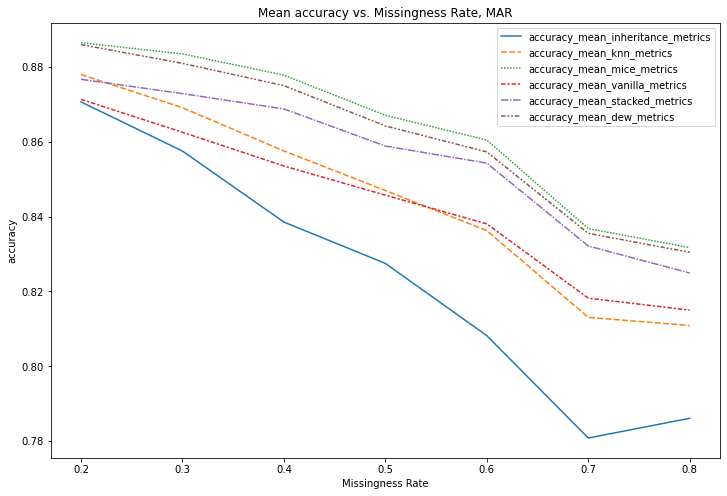

<Figure size 432x288 with 0 Axes>

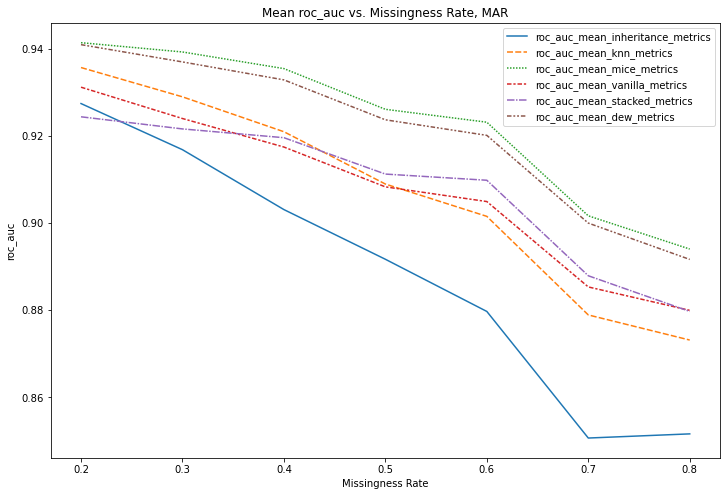

<Figure size 432x288 with 0 Axes>

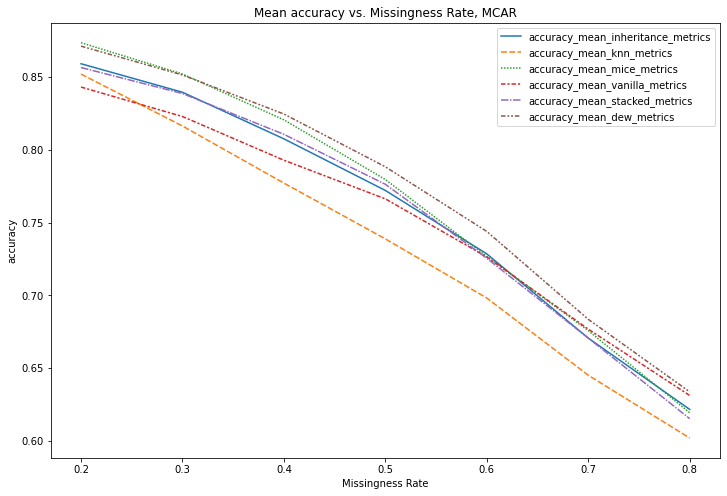

<Figure size 432x288 with 0 Axes>

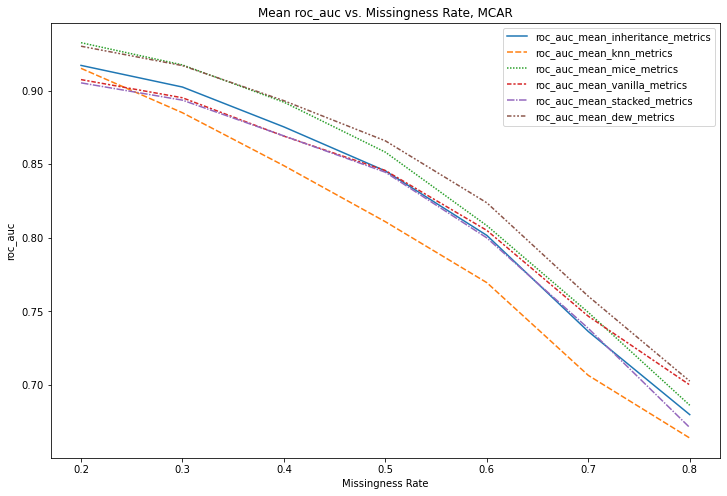

<Figure size 432x288 with 0 Axes>

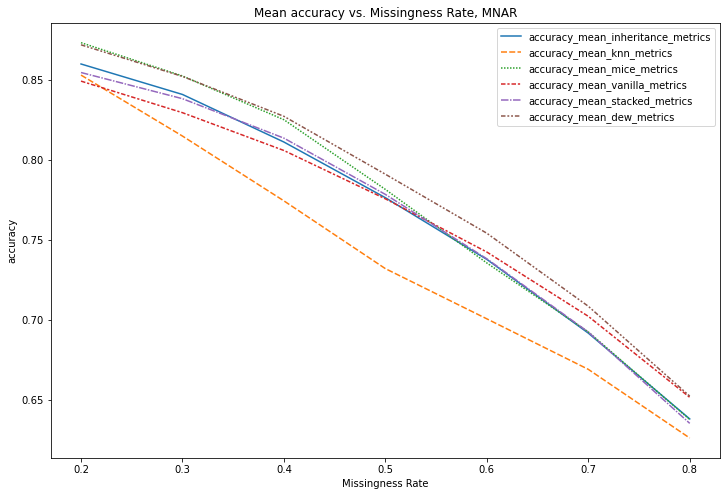

<Figure size 432x288 with 0 Axes>

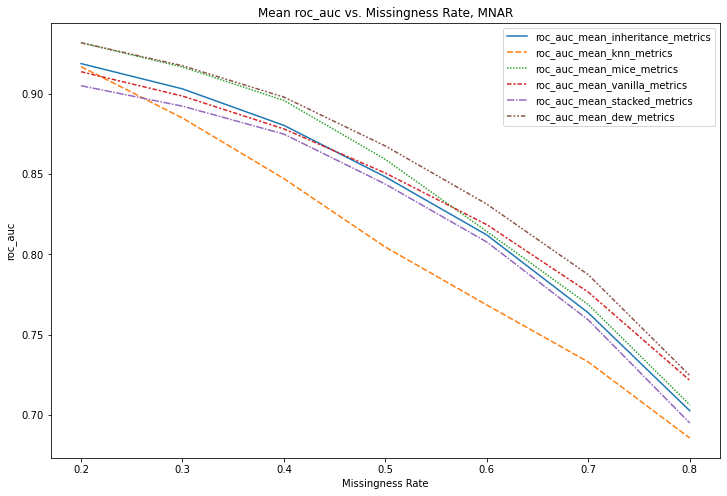

<Figure size 432x288 with 0 Axes>

In [17]:
for p in RESULTS_PATHS:
    exp_type = p.split('/')[-2]
    files = glob(os.path.join(p, '*'))
    df = pd.concat([pd.read_csv(f) for f in files])
    df_grouped_by_miss_rate = df.groupby('miss_rate').mean()
    for metric_ in ['accuracy', 'roc_auc']:
        metric_df = df_grouped_by_miss_rate[
            [
                x for x in df_grouped_by_miss_rate.columns
                if x[0: len(metric_)] == metric_
            ]
        ]
        metric_df = metric_df.drop(columns=[x for x in metric_df.columns if 'oracle' in x])
        
        plt.figure(figsize=(12,8))
        sns.lineplot(data=metric_df, linestyle='-')
        plt.title('Mean ' + metric_ + ' vs. Missingness Rate, ' + exp_type.upper())
        plt.ylabel(metric_)
        plt.xlabel('Missingness Rate')
        plt.savefig(
            os.path.join(
                RESULTS_START_PATH[0],
                exp_type,
                'viz',
                metric_ + '_vs_missing_rate.png'
            )
        )
        plt.show()
        
        plt.clf()
    